In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

VITALS = ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']
TESTS = ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total',
         'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2',
         'LABEL_Bilirubin_direct', 'LABEL_EtCO2']

VARIABLES = ['BaseExcess', 'Fibrinogen', 'AST', 'Alkalinephos', 'Bilirubin_total', 'Lactate', 'TroponinI', 
             'SaO2','Bilirubin_direct', 'EtCO2', 'Temp', 'RRate', 'FiO2', 'Glucose', 'ABPm', 'Potassium', 
             'ABPd', 'SpO2', 'Hct', 'Heartrate', 'ABPs', 'pH']

FEAT_DESCS = []

In [3]:
train = pd.read_csv('train_features.csv')
test = pd.read_csv('test_features.csv')
train_labels = pd.read_csv('train_labels.csv')

In [7]:
def get_patient_data(data, pid):
    return data.loc[data['pid'] == pid]

all_pids = train['pid'].unique()

In [112]:
def bound_check(args, lower, upper):
    val = np.nanmedian(args)
    if np.isnan(val):
        return 0
    if val > lower and val < upper:
        return 1
    else:
        return 2

# BaseExcess has to be between -2 and 2
def feature_BaseExcess(args):
    return bound_check(args, -2, 2)

def feature_Fibrinogen(args):
    return bound_check(args, 200, 400)

def feature_AST(args):
    return bound_check(args, 10, 40)

def feature_Alkalinephos(args):
    return bound_check(args, 20, 140)

In [100]:
def preprocess(data, pids):
    X_all = []
    for pid in pids:
        patient_data = get_patient_data(data, pid)
        feat_row = []
        for feat_desc in FEAT_DESCS:
            needed, fun = feat_desc
            args = []
            for var in needed:
                args.append(patient_data[var].to_numpy())
            feat_row.append(fun(args))
        X_all.append(feat_row)
    return X_all


In [113]:
FEAT_DESCS = [([['BaseExcess']], feature_BaseExcess),
              ([['Fibrinogen']], feature_Fibrinogen),
              ([['AST']], feature_AST),
              ([['Alkalinephos']], feature_Alkalinephos),
]

X = preprocess(train, all_pids)

In [102]:
df = pd.DataFrame(X)
df['pid'] = all_pids
pd.merge(df, train_grouped[['pid','BaseExcess', 'Fibrinogen', 'AST', 'Alkalinephos']]).head(50)

,0,1,2,3,pid,BaseExcess,Fibrinogen,AST,Alkalinephos
0,1,0,0,0,1,0.0,NaN,NaN,NaN
1,0,0,1,1,10,NaN,NaN,20.0,68.0
2,0,0,0,0,100,NaN,NaN,NaN,NaN
3,0,0,0,0,1000,NaN,NaN,NaN,NaN
4,1,0,0,0,10000,1.5,NaN,NaN,NaN
5,0,-1,-1,1,10002,NaN,161.0,41.0,38.0
6,0,0,0,0,10006,NaN,NaN,NaN,NaN
7,0,0,0,0,10007,NaN,NaN,NaN,NaN
8,0,0,1,1,10009,NaN,NaN,17.0,64.0
9,-1,0,0,0,1001,8.5,NaN,NaN,NaN


In [114]:
y = train_labels['LABEL_BaseExcess']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [115]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
print(logreg.score(X_val, y_val))

svm = LinearSVC(random_state=42)
svm.fit(X_train, y_train)
print(svm.score(X_val, y_val))
logreg.coef_

0.8631360663582709
0.8631360663582709


array([[ 3.38846048,  0.32348817,  0.22196782, -0.1044693 ]])

In [43]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18995 entries, 0 to 18994
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pid                     18995 non-null  int64  
 1   LABEL_BaseExcess        18995 non-null  float64
 2   LABEL_Fibrinogen        18995 non-null  float64
 3   LABEL_AST               18995 non-null  float64
 4   LABEL_Alkalinephos      18995 non-null  float64
 5   LABEL_Bilirubin_total   18995 non-null  float64
 6   LABEL_Lactate           18995 non-null  float64
 7   LABEL_TroponinI         18995 non-null  float64
 8   LABEL_SaO2              18995 non-null  float64
 9   LABEL_Bilirubin_direct  18995 non-null  float64
 10  LABEL_EtCO2             18995 non-null  float64
 11  LABEL_Sepsis            18995 non-null  float64
 12  LABEL_RRate             18995 non-null  float64
 13  LABEL_ABPm              18995 non-null  float64
 14  LABEL_SpO2              18995 non-null

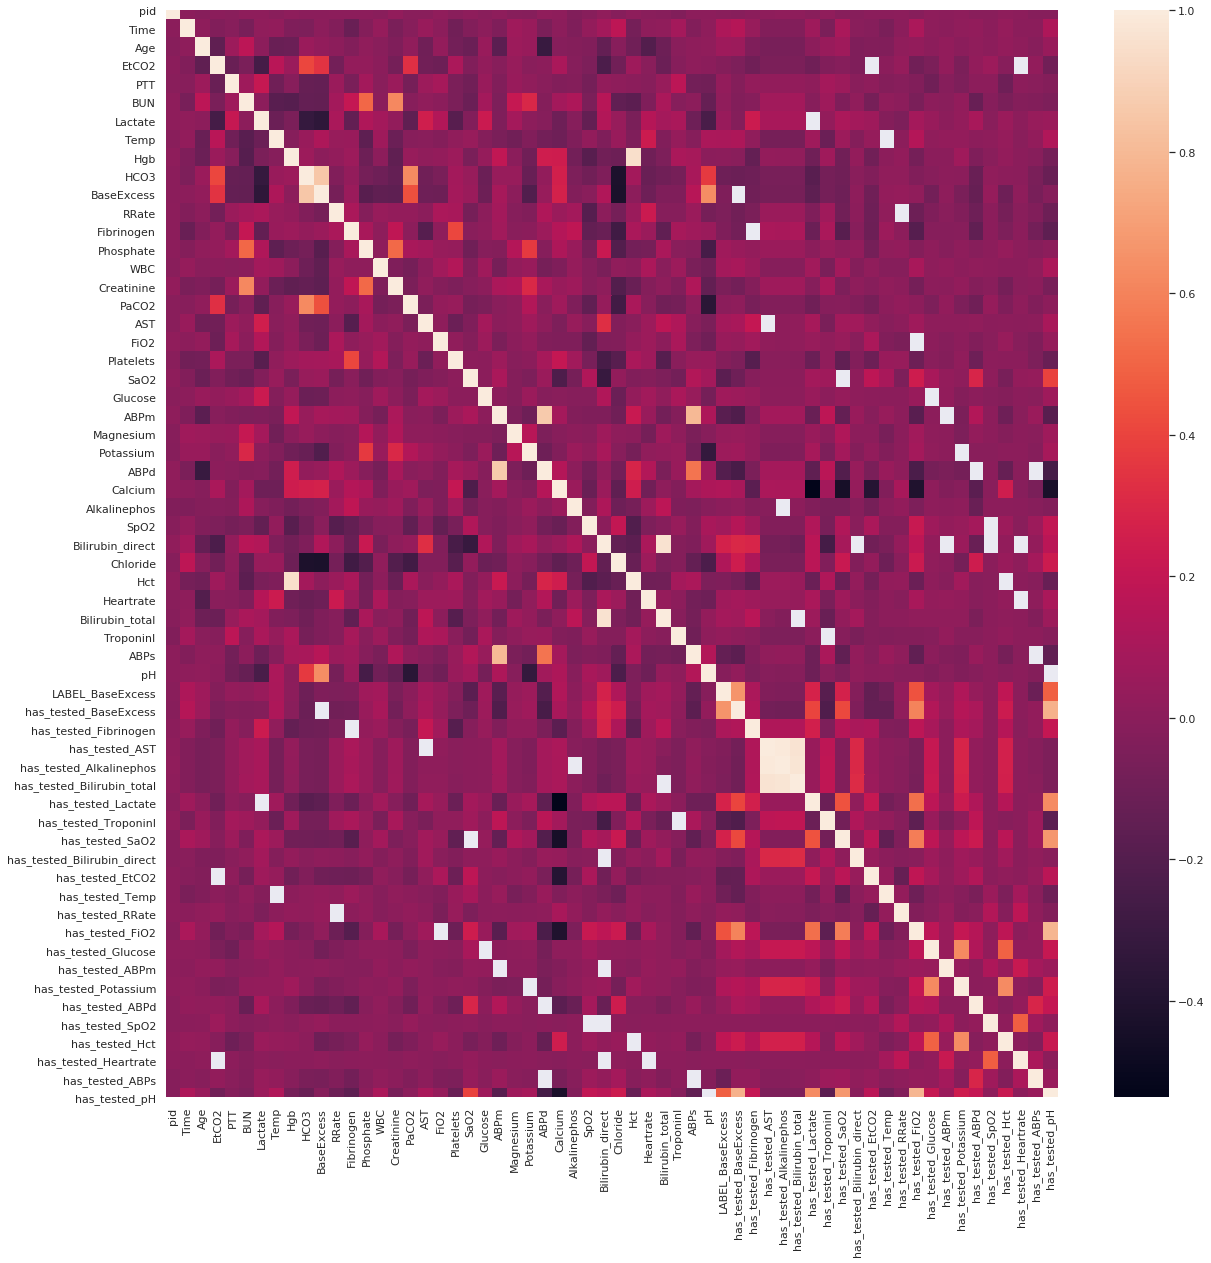

In [46]:
train_grouped = train.groupby('pid').median()
train_grouped = pd.merge(train_grouped, train_labels[['pid', 'LABEL_BaseExcess']], on='pid')

for var in VARIABLES:
    train_grouped['has_tested_' + var] = np.where(pd.isna(train_grouped[var]), 0, 1)

corr = train_grouped.corr()

# plot the heatmap
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)